You are given a dataset where each data point has one feature X and one target varibale y. The relationship between X and y is linear, and can be expressed as : $$ y = 2X + 3 $$ 
Your task is to build a neural network that can learn this relationship. That is, given a new x value, your model should be able to predict the corresponding y value.

In [1]:
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


X = torch.arange(1,21)
y = 2*X + 3

RANDOME_SEED = 42
torch.manual_seed(RANDOME_SEED)

# Train test split ratio... 80/20
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=RANDOME_SEED )
# model class for linear regression
class LinearRegression(nn.Module) :
    def __init__(self) :
        super().__init__()   
        self.weights = nn.Parameter(torch.randn(1, 
                                                requires_grad=True, 
                                                dtype=torch.float)
                                                )
        self.bias = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float)
                                                )
    def forward(self, X) :
        return self.weights * X + self.bias
    
model = LinearRegression()

tensor([ 5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39,
        41, 43])
tensor([ 7.1993,  5.1792,  9.2194,  3.8324, 13.9331, 12.5864, 10.5662,  3.1590,
         7.8727, 14.6065,  4.5058,  9.8928,  6.5259,  8.5461, 11.2396,  5.8525])


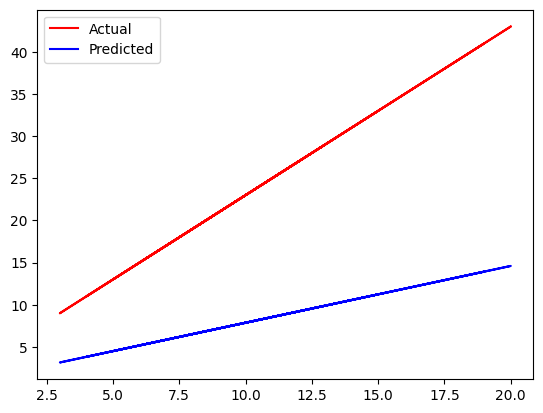

In [2]:
# prediction test before training
with torch.inference_mode() :
    y_pred = model(y_train)

print(f"{y}\n{y_pred}")

fig, ax = plt.subplots()
ax.plot(X_train, y_train, 'r', label='Actual')
ax.plot(X_train, y_pred, 'b', label='Predicted')
ax.legend()
plt.show()